# Images of accretion disks around a Kerr black hole

This Jupyter/SageMath notebook is relative to the lectures
[Geometry and physics of black holes](https://luth.obspm.fr/~luthier/gourgoulhon/bh16/).

In [1]:
version()

'SageMath version 9.3.beta7, Release Date: 2021-02-07'

In [2]:
%display latex

In [3]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

## Functions $\ell_{\rm c}(r_0)$ and $q_{\rm c}(r_0)$ for critical null geodesics

We use $m=1$ and denote $r_0$ simply by $r$.

In [4]:
a, r = var('a r') 

In [5]:
lsph(a, r) = (r^2*(3 - r) - a^2*(r + 1))/(a*(r -1))
lsph

(a, r) |--> -(a^2*(r + 1) + (r - 3)*r^2)/(a*(r - 1))

In [6]:
qsph(a, r) = r^3 / (a^2*(r - 1)^2) * (4*a^2 - r*(r - 3)^2)
qsph

(a, r) |--> -((r - 3)^2*r - 4*a^2)*r^3/(a^2*(r - 1)^2)

The radii $r_+$ and $r_-$ of the two horizons:

In [7]:
rp(a) = 1 + sqrt(1 - a^2)
rm(a) = 1 - sqrt(1 - a^2)

## Critical radii $r_{\rm ph}^{**}$, $r_{\rm ph}^*$, $r_{\rm ph}^+$, $r_{\rm ph}^-$, $r_{\rm ph}^{\rm ms}$ and $r_{\rm ph}^{\rm pol}$ 

In [8]:
rph_ss(a) = 1/2 + cos(2/3*asin(a) + 2*pi/3)
rph_ss

a |--> cos(2/3*pi + 2/3*arcsin(a)) + 1/2

In [9]:
rph_s(a) = 4*cos(acos(-a)/3 + 4*pi/3)^2
rph_s

a |--> 4*cos(4/3*pi + 1/3*arccos(-a))^2

In [10]:
rph_p(a) = 4*cos(acos(-a)/3)^2
rph_p

a |--> 4*cos(1/3*arccos(-a))^2

In [11]:
rph_m(a) = 4*cos(acos(a)/3)^2
rph_m

a |--> 4*cos(1/3*arccos(a))^2

We add the radius of the marginally stable orbit:

In [12]:
rph_ms(a) = 1 - (1 - a^2)^(1/3)
rph_ms

a |--> -(-a^2 + 1)^(1/3) + 1

as well as the radius of outer and inner polar orbits:

In [13]:
rph_pol(a) = 1 + 2*sqrt(1 - a^2/3)*cos(1/3*arccos((1 - a^2)/(1 - a^2/3)^(3/2)))
rph_pol

a |--> 2*sqrt(-1/3*a^2 + 1)*cos(1/3*arccos(-(a^2 - 1)/(-1/3*a^2 + 1)^(3/2))) + 1

In [14]:
rph_pol_in(a) = 1 + 2*sqrt(1 - a^2/3)*cos(1/3*arccos((1 - a^2)/(1 - a^2/3)^(3/2)) + 2*pi/3)
rph_pol_in

a |--> 2*sqrt(-1/3*a^2 + 1)*cos(2/3*pi + 1/3*arccos(-a^2/(-1/3*a^2 + 1)^(3/2) + 1/(-1/3*a^2 + 1)^(3/2))) + 1

In [15]:
a0 = 0.6
# a0 = 1
show(LatexExpr(r'r_{\rm ph}^{**} = '), n(rph_ss(a0)))
show(LatexExpr(r'r_{\rm ph}^{\rm ms} = '), n(rph_ms(a0)))
show(LatexExpr(r'r_{\rm ph}^{*} = '), n(rph_s(a0)))
show(LatexExpr(r'r_- = '), n(rm(a0)))
show(LatexExpr(r'r_+ = '), n(rp(a0)))
show(LatexExpr(r'r_{\rm ph}^+ = '), n(rph_p(a0)))
show(LatexExpr(r'r_{\rm ph}^- = '), n(rph_m(a0)))
show(LatexExpr(r'r_{\rm ph}^{\rm pol} = '), n(rph_pol(a0)))
show(LatexExpr(r'r_{\rm ph}^{\rm pol,in} = '), n(rph_pol_in(a0)))

r_{\rm ph}^{**} =  -0.314924848565960

r_{\rm ph}^{\rm ms} =  0.138226123987247

r_{\rm ph}^{*} =  0.181236283104446

r_- =  0.200000000000000

r_+ =  1.80000000000000

r_{\rm ph}^+ =  2.18891401976363

r_{\rm ph}^- =  3.62984969713192

r_{\rm ph}^{\rm pol} =  2.82766198207578

r_{\rm ph}^{\rm pol,in} =  -0.280898776952324

In [16]:
def alpha(a, th_obs, r0):
    if a == 1:
        ell = - r0^2 + 2*r0 + 1
    else:
        ell = lsph(a, r0)
    return - ell / sin(th_obs)

def Theta(a, th_obs, r0):
    if a == 1:
        ell = - r0^2 + 2*r0 + 1
        q = r0^3 * (4 - r0)
    else:
        ell = lsph(a, r0)
        q = qsph(a, r0)
    return q + cos(th_obs)^2 * (a^2 - ell^2/sin(th_obs)^2)

def beta(a, th_obs, r0, eps_theta=1):
    return eps_theta * sqrt(Theta(a, th_obs, r0,))

In [17]:
def r0_bounds(a, th_obs, outer=True):
    r"""
    Return `(r0_min, r0_max)`
    """
    if outer:
        r1 = n(rph_p(a))
        r2 = n(rph_m(a))
        r3 = rph_pol(a)
    else:
        r1 = n(rph_ss(a))
        r2 = 0
        r3 = rph_pol_in(a)
    #
    # Computation of rmin:
    try:
        if a == 1:
            th_crit = n(asin(sqrt(3) - 1))
            if n(th_obs) < th_crit or n(th_obs) > n(pi) - th_crit:
                rmin = find_root(lambda r: Theta(a, th_obs, r), r1, r3)
            else:
                rmin = 1
        else:
            rmin = find_root(lambda r: Theta(a, th_obs, r), r1, r3)
    except TypeError:  # special case th_obs = pi/2
        rmin = r1    
    #
    # Computation of rmax:
    try:
        rmax = find_root(lambda r: Theta(a, th_obs, r), r3, r2)
    except TypeError:  # special case th_obs = pi/2
        rmax = r2    
    #
    return (rmin, rmax)

In [18]:
def shadow_plot(a, th_obs, outer=True, color=None, number_colors=5, 
                range_col=None, thickness=2, linestyle='-', legend='automatic', 
                legend_loc=(1.02, 0.36), fill=True, fillcolor='grey', 
                draw_NHEKline=True, frame=True, axes=True, axes_labels='automatic', 
                gridlines=True):
    if a==0:
        # Case a = 0:
        rs = 3*sqrt(3)
        if color is None:
            color = 'black'
        if legend == 'automatic':
            legend = None
        g = parametric_plot((rs*cos(x), rs*sin(x)), (x, 0, 2*pi), 
                            color=color, thickness=thickness,
                            linestyle=linestyle, legend_label=legend, 
                            fill=fill, fillcolor=fillcolor, frame=frame, 
                            axes=axes, gridlines=gridlines)
    else:
        # Case a != 0
        rmin, rmax = r0_bounds(a, th_obs, outer=outer)
        if rmin > 0:
            rmin = 1.00000001*rmin
            rmax = 0.99999999*rmax
        else:
            rmin = 0.9999999*rmin
            rmax = 1.0000001*rmax
        print("rmin : ", rmin, "  rmax : ", rmax)
        fa = lambda r: alpha(a, th_obs, r)
        fb = lambda r: beta(a, th_obs, r)
        fbm = lambda r: beta(a, th_obs, r, eps_theta=-1)
        if range_col is None:
            range_col = r0_bounds(a, pi/2, outer=outer)
        rmin_col, rmax_col = range_col 
        print("rmin_col : ", rmin_col, "  rmax_col : ", rmax_col)
        dr = (rmax_col - rmin_col) / number_colors
        rm = rmin_col + int((rmin - rmin_col)/dr)*dr
        r1s = rmin
        r_ranges = []
        while rm + dr < rmax:
            col = hue((rm - rmin_col)/(rmax_col - rmin_col + 0.1))
            r2s = rm + dr
            r_ranges.append((r1s, r2s, col))
            rm += dr
            r1s = r2s
        if color is None:
            col = hue((rm - rmin_col)/(rmax_col - rmin_col + 0.1))
        else:
            col = color
        r_ranges.append((r1s, rmax, col))
        g = Graphics()
        legend_label = None  # a priori
        if a == 1 and draw_NHEKline:
            th_crit = asin(sqrt(3) - 1)
            if th_obs > th_crit and th_obs < pi - th_crit:
                # NHEK line
                alpha0 = -2/sin(th_obs)
                beta0 = sqrt(3 - cos(th_obs)**2 *(6 + cos(th_obs)**2))/sin(th_obs)
                if legend == 'automatic':
                    legend_label = r"$r_0 = m$"
                if color is None:
                    colNHEK = 'maroon'
                else:
                    colNHEK = color
                g += line([(alpha0, beta0), (alpha0, -beta0)], color=colNHEK, 
                          thickness=thickness, linestyle=linestyle,
                          legend_label=legend_label)
                if fill:
                    g += polygon2d([(fa(rmax), 0), (alpha0, beta0), (alpha0, -beta0)], 
                                   color=fillcolor, alpha=0.5)
        for rg in r_ranges:
            r1s, r2s = rg[0], rg[1]
            col = rg[2]
            if legend:
                if legend == 'automatic':
                    if draw_NHEKline and abs(r1s - 1) < 1e-5:
                        legend_label = r"${:.2f}\, m < r_0 \leq {:.2f}\, m$".format(
                                       float(r1s), float(r2s))
                    else:
                        legend_label = r"${:.2f}\, m \leq r_0 \leq {:.2f}\, m$".format(
                                       float(r1s), float(r2s))
                else:
                    legend_label = legend
            g += parametric_plot((fa, fb), (r1s, r2s), plot_points=200, color=col, 
                                 thickness=thickness, linestyle=linestyle,
                                 legend_label=legend_label, 
                                 frame=frame, axes=axes, gridlines=gridlines)
            g += parametric_plot((fa, fbm), (r1s, r2s), plot_points=200, color=col, 
                                 thickness=thickness, linestyle=linestyle)
        if fill:
            g += parametric_plot((fa, fb), (rmin, rmax), fill=True, fillcolor=fillcolor, 
                                 thickness=0)
            g += parametric_plot((fa, fbm), (rmin, rmax), fill=True, fillcolor=fillcolor, 
                                 thickness=0)
        # end of case a != 0
    if axes_labels:
        if axes_labels == 'automatic':
            g.axes_labels([r"$(r_{\mathscr{O}}/m)\; \alpha$", 
                           r"$(r_{\mathscr{O}}/m)\; \beta$"])
        else:
            g.axes_labels(axes_labels)
    g.set_aspect_ratio(1)
    if legend:
        g.set_legend_options(handlelength=2, loc=legend_loc)
    return g


rmin :  1.00000001000000   rmax :  3.99999996000000
rmin_col :  1   rmax_col :  4.0


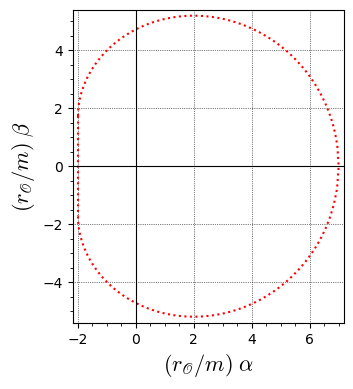

In [19]:
shadow_plot(1, pi/2, fill=False, color='red', number_colors=1, 
            thickness=1.5, linestyle=':', legend=False)

Half-width of the image in units of $m/r_{\mathscr{O}}$:

In [20]:
gyoto_field_of_view = 74  # Gyoto field of view for M87* (in microarcseconds)
scale_M87 = 3.66467403690525  # m/r for M87* (in microarcseconds)
fsize = gyoto_field_of_view / 2 / scale_M87
extent = (-fsize, fsize, -fsize, fsize)
print("fsize =", fsize, "m/r_obs")

fsize = 10.0963959215444 m/r_obs


Default resolution of SageMath images:

In [21]:
dpi = Graphics.SHOW_OPTIONS['dpi']
dpi

100

Default resolution of Matplotlib images:

In [22]:
from matplotlib import rcParams
rcParams['figure.dpi']

72.0

In [23]:
gyoto_images = {'a95_th00': (0.95, 0),
                'a95_th30': (0.95, pi/6),
                'a95_th60': (0.95, pi/3),
                'a95_th90': (0.95, pi/2)}

In [24]:
#gyoto_images = {'a50_th00-log': (0.5, 0), 
#                'a50_th30-log': (0.5, pi/6),
#                'a50_th60-log': (0.5, pi/3), 
#                'a50_th90-log': (0.5, pi/2)}

In [25]:
#gyoto_images = {'a50_th00': (0.5, 0), 
#                'a50_th30': (0.5, pi/6),
#                'a50_th60': (0.5, pi/3), 
#                'a50_th90': (0.5, pi/2)}

In [26]:
#gyoto_images = {'a60_th00_PT': (0.6, 0),
#                'a60_th1_5_PT-log': (0.6, 1.5)}
#gyoto_images = {'a60_th00_PT_16-log': (0.6, 0)}

a95_th00  resolution: (500, 500, 3)
figsize:  (5.0, 5.0)
a/m = 0.950000000000000   theta_obs = 0
rmin :  2.49118715973461   rmax :  2.49420141399888
rmin_col :  1.3862805284629751   rmax_col :  3.95534731767268


<IPython.core.display.Javascript object>


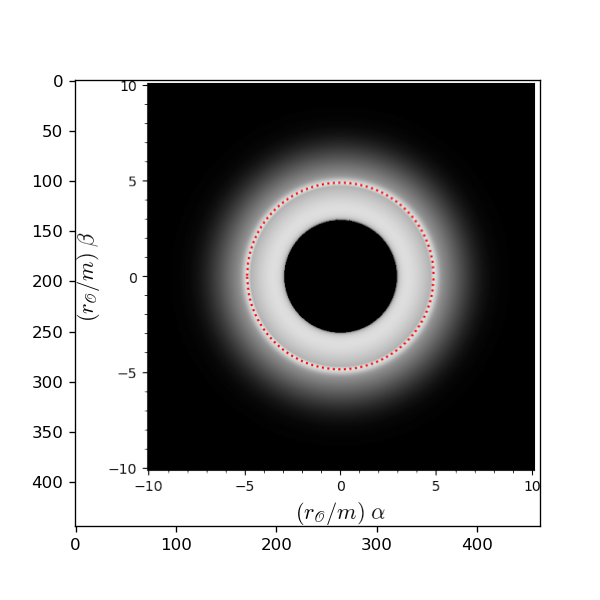

 
a95_th30  resolution: (500, 500, 3)
figsize:  (5.0, 5.0)
a/m = 0.950000000000000   theta_obs = 1/6*pi
rmin :  1.76846188276999   rmax :  3.23697774665377
rmin_col :  1.3862805284629751   rmax_col :  3.95534731767268


<IPython.core.display.Javascript object>


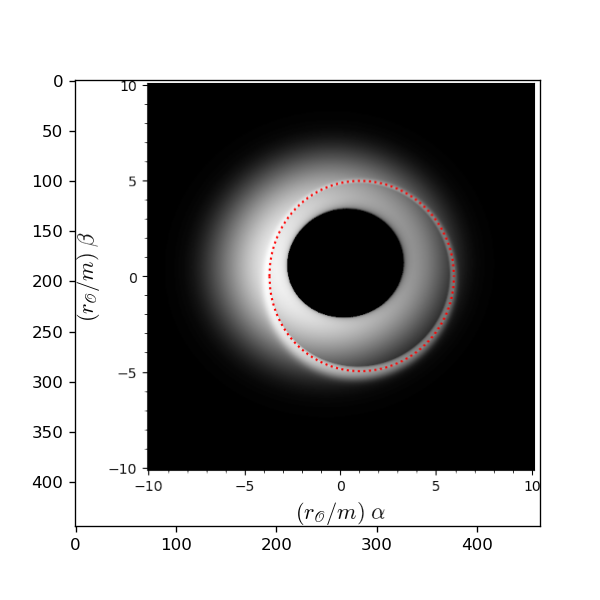

 
a95_th60  resolution: (500, 500, 3)
figsize:  (5.0, 5.0)
a/m = 0.950000000000000   theta_obs = 1/3*pi
rmin :  1.44011965009280   rmax :  3.76536147242618
rmin_col :  1.3862805284629751   rmax_col :  3.95534731767268


<IPython.core.display.Javascript object>


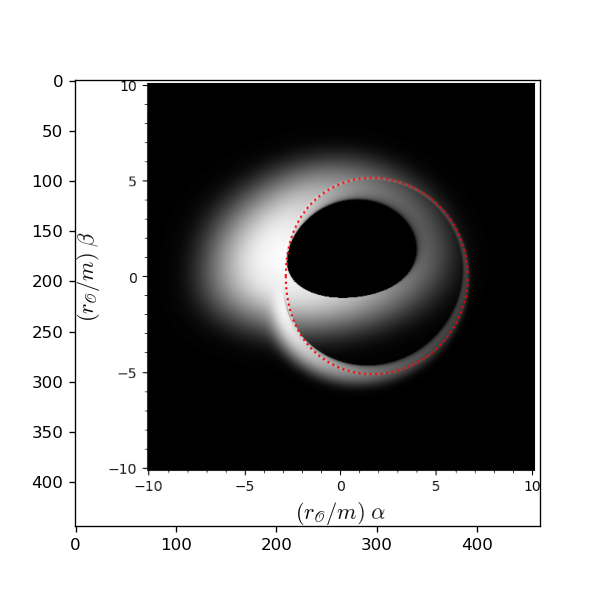

 
a95_th90  resolution: (500, 500, 3)
figsize:  (5.0, 5.0)
a/m = 0.950000000000000   theta_obs = 1/2*pi
rmin :  1.38628054232578   rmax :  3.95534727811920
rmin_col :  1.3862805284629751   rmax_col :  3.95534731767268


<IPython.core.display.Javascript object>


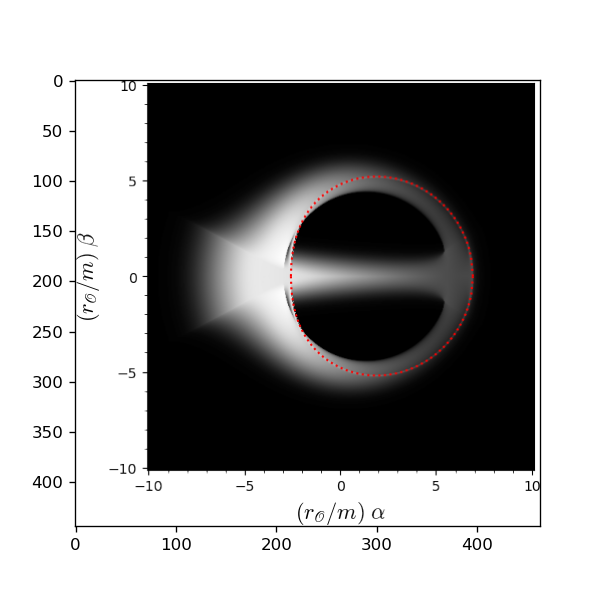

In [27]:
%display plain
%matplotlib notebook
frame = True
axes_labels = 'automatic'
#axes_labels = False
test_size = False
for gimage, param in gyoto_images.items():
    img = mpimg.imread(gimage + '.png')
    print(gimage, " resolution:", img.shape)
    # size of the image in inches:
    figsize = (float(img.shape[0])/dpi, float(img.shape[1])/dpi)
    print("figsize: ", figsize)
    a0, th_obs = param
    print("a/m =", a0, "  theta_obs =", th_obs)
    # Critical curve as a SageMath graphics object from shadow_plot
    if th_obs == 0:
        th_obs = 0.001
    gcrit = shadow_plot(a0, th_obs, fill=False, color='red', number_colors=1, 
                        thickness=1.5, linestyle=':', frame=frame, axes=False, 
                        axes_labels=axes_labels, gridlines=False, legend=False)
    if test_size:
        axes_labels_bck = gcrit.axes_labels()
        gcrit += point((-fsize, 0), size=60, color='red', zorder=100)
        gcrit += point((fsize, 0), size=60, color='red', zorder=100)
        gcrit += point((0, -fsize), size=60, color='red', zorder=100)
        gcrit += point((0, fsize), size=60, color='red', zorder=100)
        gcrit.axes_labels(axes_labels_bck)
    gcrit.set_axes_range(-fsize, fsize, -fsize, fsize)
    # Matplotlib figure corresponding to gcrit:
    options = gcrit.SHOW_OPTIONS.copy()
    options.update(gcrit._extra_kwds)
    options['figsize'] = figsize
    options['axes_pad'] = 0
    options.pop('dpi')           # strip meaningless options for matplotlib
    options.pop('transparent')   #
    options.pop('fig_tight')     #
    fcrit = gcrit.matplotlib(**options)
    # Adding the Gyoto image onto it:
    ax = fcrit.axes[0]
    ax.imshow(img, extent=extent)
    # Save result to png and pdf
    fcrit.savefig(gimage + '_crit.png', dpi=dpi, pad_inches=0, 
                  bbox_inches='tight', transparent=True)
    fcrit.savefig(gimage + '_crit.pdf', pad_inches=0, 
                  bbox_inches='tight')
    # Only for display in the current notebook:
    fig = plt.figure(figsize=figsize, dpi=dpi, frameon=False)
    imgc = mpimg.imread(gimage + '_crit.png')
    if axes_labels:
        imgcp = plt.imshow(imgc)
    else:
        imgcp = plt.imshow(imgc, extent=extent)
    print(" ")